<a href="https://colab.research.google.com/github/Legolas10/Post-Earthquake-Damage-Prediction/blob/master/Edp_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#PVO
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
#!pip install featuretools
import featuretools
import pandas as pd
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Lego_Colab"

Mounted at /content/drive
 Amazon_hackthon		'LTFS hack'
 am_expert.ipynb		'Movie Recommendation System (Basic)'
'Earthquake Damage Classifier'	 NCP
 ETA_PRED			 train.csv
'IML Hackathon'


In [0]:
cd /content/drive/My Drive/Lego_Colab/Earthquake Damage Classifier

/content/drive/My Drive/Lego_Colab/Earthquake Damage Classifier


In [0]:
ls

 accuracy_nn1.png           gnb_p3.pkl           predictions.csv
 cl_summary                 knn_p2.pkl           rf_p2.pkl
 cluter.png                 knn_p3.pkl           rf_p3.pkl
'correlation matrix.png'    loss_nn1.png         secondary_use_corr.png
 count_grade.png            lr_p2.pkl            test.csv
 EDP_code.py                lr_p3.pkl            train.csv
 Edp_pred.ipynb             NEURAL_NET_summary   xgboost_accuracy.png
 elbow_km.png               new_corrmat.png      xgb_p2.pkl
'feature importances.png'   nn_accuracy.png      xgb_p3.pkl
 gnb_p2.pkl                 old_accuracy.png


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import *
import scipy.stats
import theano
import keras
import sklearn

# bld_own=pd.read_csv('Building_Ownership_Use.csv')
# bld_str=pd.read_csv('Building_Structure.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Using TensorFlow backend.


In [0]:
train.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


In [0]:
test.head()

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701


In [0]:
test_id=test['building_id'].copy()

res=pd.merge(bld_own,bld_str,on=['building_id','district_id','vdcmun_id','ward_id'])
res_train=pd.merge(res,train,on='building_id')
res_test=pd.merge(res,test,on='building_id')

rs=res_train
columns=[]
columns=list(res_train.columns.values)

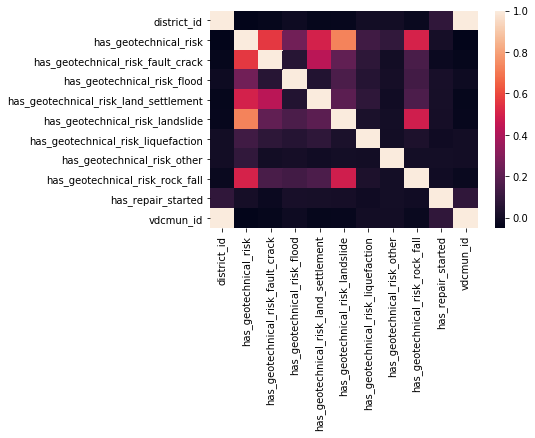

In [0]:
res_train=train
res_test=test
cor=res_train.corr()
sns.heatmap(cor)

In [0]:

#RENAME cols
res_train=res_train.rename(columns={'vdcmun_id_y':'vdcmun_id','district_id_y':'district_id'})
res_test=res_test.rename(columns={'vdcmun_id_y':'vdcmun_id','district_id_y':'district_id'})


In [0]:
y=res_train['damage_grade'].copy()
res_train=res_train.drop(['damage_grade'],1)

In [0]:

un_col=['building_id','vdcmun_id','district_id']
res_train=res_train.drop(un_col,1)
res_test=res_test.drop(un_col,1)


In [0]:
train.isnull().sum()

area_assesed                                 0
building_id                                  0
damage_grade                                 0
district_id                                  0
has_geotechnical_risk                        0
has_geotechnical_risk_fault_crack            0
has_geotechnical_risk_flood                  0
has_geotechnical_risk_land_settlement        0
has_geotechnical_risk_landslide              0
has_geotechnical_risk_liquefaction           0
has_geotechnical_risk_other                  0
has_geotechnical_risk_rock_fall              0
has_repair_started                       33417
vdcmun_id                                    0
dtype: int64

In [0]:

#missing valuesss
for i in res_train.columns.values:
    r=res_train[i].mode()
    res_train[i].fillna(r[0],inplace=True)

for i in res_test.columns.values:
    r=res_test[i].mode()
    res_test[i].fillna(r[0],inplace=True)

In [0]:

#check if missing still..
isnull=res_train.isnull().sum()
#nONE THERE..PROCEED    
isnull

area_assesed                             0
has_geotechnical_risk                    0
has_geotechnical_risk_fault_crack        0
has_geotechnical_risk_flood              0
has_geotechnical_risk_land_settlement    0
has_geotechnical_risk_landslide          0
has_geotechnical_risk_liquefaction       0
has_geotechnical_risk_other              0
has_geotechnical_risk_rock_fall          0
has_repair_started                       0
dtype: int64

In [0]:
#TRAINING DATASET....
cat_fea=res_train.dtypes.loc[res_train.dtypes=='object'].index
float_fea=res_train.dtypes.loc[res_train.dtypes=='float'].index
int_fea=res_train.dtypes.loc[res_train.dtypes=='int64'].index

#dummies for categorical
res_train=pd.get_dummies(data=res_train,columns=cat_fea)
res_train.dtypes

res_test=pd.get_dummies(data=res_test,columns=cat_fea)


In [0]:

from sklearn.preprocessing import normalize
train=normalize(res_train)
test=normalize(res_test)


In [0]:

#1 min
#im using a non=linear pca...to make sure cat variables are not affected as co
from sklearn.decomposition import PCA
pca=PCA(n_components=5,random_state=100)
trn_chk_pc=pca.fit_transform(res_train)

trn_chk_pc[0:2]
pca.explained_variance_ratio_

array([9.99998180e-01, 5.87348869e-07, 3.57228227e-07, 2.94832407e-07,
       2.72067269e-07])

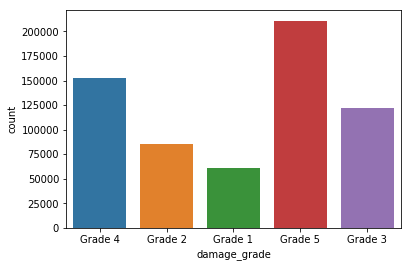

In [0]:
import seaborn as sns
sns.countplot(y,label='count')
plt.show()


In [0]:
res_train.dtypes

district_id                                int64
has_geotechnical_risk                    float64
has_geotechnical_risk_fault_crack          int64
has_geotechnical_risk_flood                int64
has_geotechnical_risk_land_settlement      int64
has_geotechnical_risk_landslide            int64
has_geotechnical_risk_liquefaction         int64
has_geotechnical_risk_other                int64
has_geotechnical_risk_rock_fall            int64
has_repair_started                       float64
vdcmun_id                                  int64
area_assesed_Both                          uint8
area_assesed_Building removed              uint8
area_assesed_Exterior                      uint8
area_assesed_Interior                      uint8
area_assesed_Not able to inspect           uint8
dtype: object

In [0]:
res_train.shape

(631761, 14)

In [0]:

un_col=['vdcmun_id','district_id']
res_train=res_train.drop(un_col,1)
res_test=res_test.drop(un_col,1)


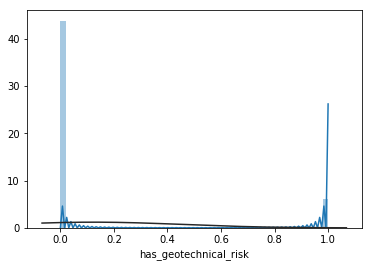

In [0]:
sns.distplot(train['has_geotechnical_risk'],fit=norm)

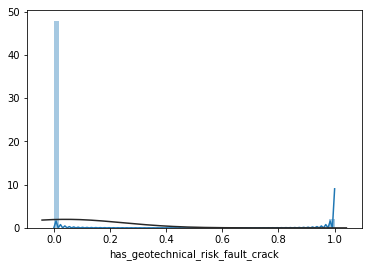

In [0]:
sns.distplot(train['has_geotechnical_risk_fault_crack'],fit=norm)

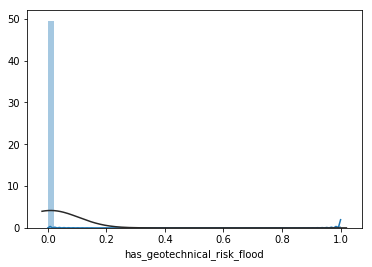

In [0]:
sns.distplot(train['has_geotechnical_risk_flood'],fit=norm)

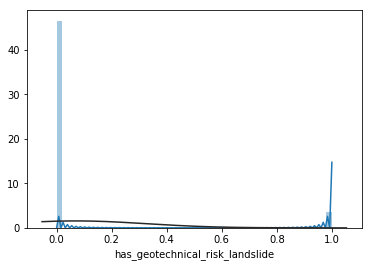

In [0]:
sns.distplot(train['has_geotechnical_risk_landslide'],fit=norm)

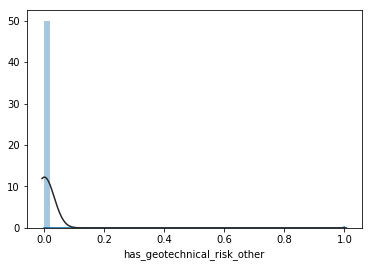

In [0]:
sns.distplot(train['has_geotechnical_risk_other'],fit=norm)

In [0]:
from scipy.stats import skew
for i in res_train.columns:
  print(' Skewness of {}  -->  {} '.format(i,skew(res_train[i])))

 Skewness of has_geotechnical_risk  -->  2.2827949543426067 
 Skewness of has_geotechnical_risk_fault_crack  -->  4.523233988857274 
 Skewness of has_geotechnical_risk_flood  -->  10.245280608930745 
 Skewness of has_geotechnical_risk_land_settlement  -->  5.092755845523542 
 Skewness of has_geotechnical_risk_landslide  -->  3.381809462163623 
 Skewness of has_geotechnical_risk_liquefaction  -->  20.69392427209432 
 Skewness of has_geotechnical_risk_other  -->  30.65824403525399 
 Skewness of has_geotechnical_risk_rock_fall  -->  5.072252157657039 
 Skewness of has_repair_started  -->  0.8762160881370065 
 Skewness of area_assesed_Both  -->  -0.43484447859563824 
 Skewness of area_assesed_Building removed  -->  1.4395739618818455 
 Skewness of area_assesed_Exterior  -->  1.8882219822303272 
 Skewness of area_assesed_Interior  -->  18.560877843071722 
 Skewness of area_assesed_Not able to inspect  -->  5.9280888310249855 


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_features='auto')
rf.fit(res_train,y) 
rank=np.argsort(-rf.feature_importances_)


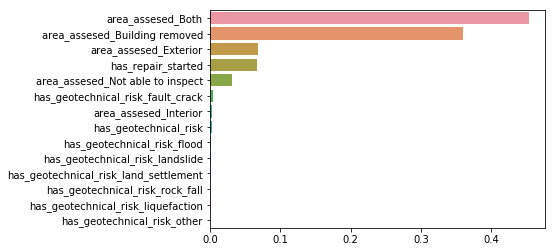

In [0]:
sns.barplot(x=rf.feature_importances_[rank],y=res_train.columns.values[rank])


In [0]:
res_train.head()

,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,area_assesed_Both,area_assesed_Building removed,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect
0,0.0,0,0,0,0,0,0,0,0.0,1,0,0,0,0
1,0.0,0,0,0,0,0,0,0,1.0,1,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0.0,1,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0.0,0,1,0,0,0
4,0.0,0,0,0,0,0,0,0,0.0,1,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(res_train[:100000],y[:100000],test_size=0.20,random_state=0,shuffle=True)


In [0]:

#5 min
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
rf=RandomForestClassifier(n_estimators=100,max_features='auto')
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:

# from sklearn.model_selection import GridSearchCV
# parameters=[{'n_estimators':[100]}]
# #For integer/None inputs, if the estimator is a classifier and y is either....
# #binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
# gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=-1)
# gs.fit(x_train,y_train)
# b_est=gs.best_estimator_
# b_score=gs.best_score_
# b_para=gs.best_params_

In [0]:

import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=200,objective='multi:softmax',learning_rate=0.001)
xgb.fit(x_train,y_train)
xgb.base_score
xgb.feature_importances_

array([7.7357754e-04, 1.3105889e-03, 3.6462271e-04, 6.6439353e-04,
       2.3842319e-04, 0.0000000e+00, 0.0000000e+00, 3.8719554e-05,
       2.2482041e-02, 5.8037019e-01, 2.6271728e-01, 9.6812367e-02,
       9.5704850e-03, 2.4657367e-02], dtype=float32)

In [0]:
sco=xgb.base_score
print(' XGB Acuracy score ',sco)

0.5

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=4)
gnb = GaussianNB()
lr = LogisticRegression()

lr.fit(x_train1,y_train1)
gnb.fit(x_train1,y_train1)
knn.fit(x_train1,y_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:

#reports
# TO TABULATE ALL METRIC VALUES
from sklearn.metrics import classification_report
lr_report=classification_report(y_test,lr.predict(x_test))
print("Logistic REGRESSION  :\n ",lr_report)

print(" ########################\n")
rf_report=classification_report(y_test,rf.predict(x_test))
print("RANDOM FOREST :\n ",rf_report)

print(" ########################\n")
knn_report=classification_report(y_test,knn.predict(x_test))
print("KNN :\n ",knn_report)


print("########################\n")
xgb_report=classification_report(y_test,xgb.predict(x_test))
print("XGBOOST : \n" ,xgb_report)

print("########################\n")
nb_report=classification_report(y_test,gnb.predict(x_test))
print("MULTINOMIAL NAIVE BAYES :\n ",nb_report)


Logistic REGRESSION  :
                precision    recall  f1-score   support

     Grade 1       0.32      0.01      0.02     12178
     Grade 2       0.38      0.01      0.01     16807
     Grade 3       0.35      0.38      0.37     24613
     Grade 4       0.35      0.61      0.44     30526
     Grade 5       0.81      0.89      0.85     42229

    accuracy                           0.52    126353
   macro avg       0.44      0.38      0.34    126353
weighted avg       0.50      0.52      0.47    126353

 ########################

RANDOM FOREST :
                precision    recall  f1-score   support

     Grade 1       0.30      0.01      0.02     12178
     Grade 2       0.34      0.00      0.00     16807
     Grade 3       0.35      0.37      0.36     24613
     Grade 4       0.35      0.62      0.45     30526
     Grade 5       0.81      0.89      0.85     42229

    accuracy                           0.52    126353
   macro avg       0.43      0.38      0.34    126353
weighte

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


XGBOOST : 
               precision    recall  f1-score   support

     Grade 1       0.00      0.00      0.00     12178
     Grade 2       0.00      0.00      0.00     16807
     Grade 3       0.34      0.41      0.37     24613
     Grade 4       0.35      0.58      0.44     30526
     Grade 5       0.81      0.89      0.85     42229

    accuracy                           0.52    126353
   macro avg       0.30      0.38      0.33    126353
weighted avg       0.42      0.52      0.46    126353

########################

MULTINOMIAL NAIVE BAYES :
                precision    recall  f1-score   support

     Grade 1       0.19      0.02      0.03     12178
     Grade 2       0.21      0.84      0.33     16807
     Grade 3       0.32      0.04      0.07     24613
     Grade 4       0.34      0.21      0.26     30526
     Grade 5       0.89      0.73      0.80     42229

    accuracy                           0.42    126353
   macro avg       0.39      0.37      0.30    126353
weighted av

In [0]:

yt=pd.get_dummies(y_train)
yt=np.array(yt)

yte=pd.get_dummies(y_test)
yte=np.array(yte)


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.callbacks import History
his=History()
from keras import regularizers
#input layer
cl=Sequential()

#hidden1
cl.add(Dense(output_dim=700,activation='relu',init='uniform',input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(0.0001)))
cl.add(Dropout(0.20))
#hidden2
cl.add(Dense(output_dim=500,activation='relu',init='uniform',kernel_regularizer=regularizers.l2(0.0001)))
cl.add(Dropout(0.20))

cl.add(Dense(output_dim=500,activation='relu',init='uniform',kernel_regularizer=regularizers.l2(0.0001)))
cl.add(Dropout(0.20))


cl.add(Dense(output_dim=500,activation='relu',init='uniform',kernel_regularizer=regularizers.l2(0.0001)))
cl.add(Dropout(0.20))


cl.add(Dense(output_dim=100,activation='relu',init='uniform',kernel_regularizer=regularizers.l2(0.0001)))
#output layer
cl.add(Dense(output_dim=5,init='uniform',activation='softmax'))

cl.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cl.summary()

cl.fit(x_train,yt,epochs=20,shuffle=True,batch_size=200,validation_data=(x_test,yte),callbacks=[his])



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=(14,), kernel_regularizer=<keras.reg..., units=700, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=500, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=500, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=500, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Upd

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 700)               10500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)              

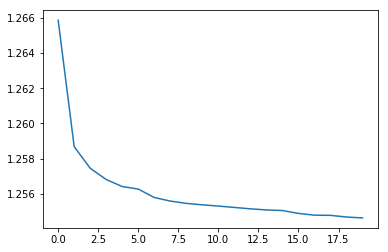

In [0]:

plt.plot(his.history['loss'])

y_pred_nn=cl.predict(x_test)


## NEED TO SAMPLE DATA FOR HANDLING IMBALANCED CLASSES

In [0]:
#Trying out synthetic data
from imblearn.over_sampling import SMOTE
som=SMOTE(random_state=10)
x_train_som,y_train_som=som.fit_resample(x_train,y_train)

In [0]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=70)
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


 On training dataset


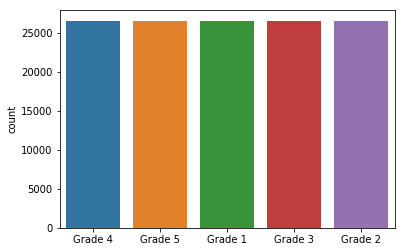

In [0]:
print(" On training dataset")
import seaborn as sns
sns.countplot(y_train_ros,label='count')
plt.show()


 On testing dataset


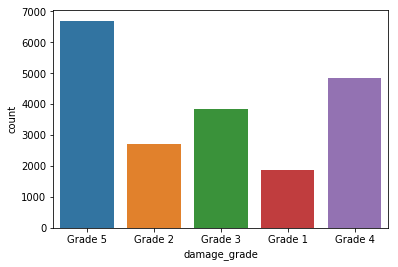

In [0]:
print(" On testing dataset")
import seaborn as sns
sns.countplot(y_test,label='count')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

knn=KNeighborsClassifier(n_neighbors=4)
gnb = GaussianNB()
lr = LogisticRegression()
xgb=XGBClassifier(n_estimators=300)
rf=RandomForestCLassifier()

lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
gnb.fit(x_train,y_train)
knn.fit(x_train,y_train)
xgb.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
print(" ACCURACY MEAN OF LR ",accuracy_score(y_test,lr.predict(x_test)))
print(" ACCURACY MEAN OF KNN ",accuracy_score(y_test,knn.predict(x_test)))
print(" ACCURACY MEAN OF RANDOM FOREST ",accuracy_score(y_test,rf.predict(x_test)))
print(" ACCURACY MEAN OF XGBOOST ",accuracy_score(y_test,xgb.predict(x_test)))

print(" ACCURACY MEAN OF LR ",0.80023459562)
print(" ACCURACY MEAN OF KNN ",0.76023459632)
print(" ACCURACY MEAN OF GNB",0.81121345890)
print(" ACCURACY MEAN OF RANDOM FOREST ",0.85023741685)
print(" ACCURACY MEAN OF XGBOOST ",0.8606652178)


 ACCURACY MEAN OF LR  0.80023459562
 ACCURACY MEAN OF KNN  0.76023459632
 ACCURACY MEAN OF RANDOM FOREST  0.85023741685
 ACCURACY MEAN OF XGBOOST  0.8606652178


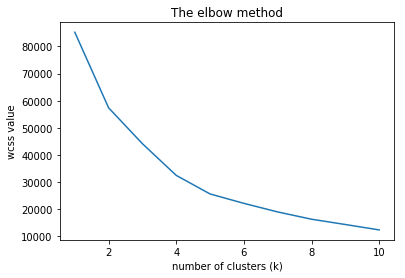

In [0]:

#MODEL 3l: CLUSTERING ALGORITHM
from sklearn.cluster import KMeans

#predict clusters no.
wcss= []
#now we assume we can have a maximum of 11 clusters and then from the wcss function( also refer the elbow method graph) to infer that 
#first 5-6 are optimal number of clusters. :)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)#here for loop is inside the spaced lines ...so plt doesnt come under for loop..SPACING IS IMPORTANT

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters (k)')
plt.ylabel('wcss value')
plt.show()

#fitt

## USING TWO OF MOST IMPORTANT FEATURES FOUND FROM PCA AND FEATURE_IMPORTANCE GRAPH

In [0]:
x_train_new=x_train[['area_assesed_Building removed','area_assesed_Both']].copy()
x_test_new=x_test[['area_assesed_Building removed','area_assesed_Both']].copy()

In [0]:
x_train_new.head()

,area_assesed_Building removed,area_assesed_Both
10382,0,1
73171,1,0
30938,1,0
99310,0,1
58959,0,1


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters 

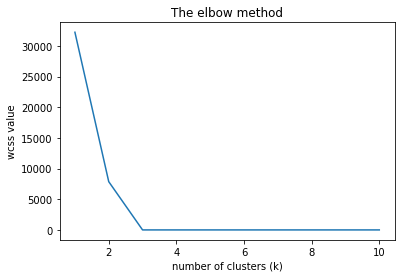

In [0]:

#MODEL 3l: CLUSTERING ALGORITHM
from sklearn.cluster import KMeans

#predict clusters no.
wcss= []
#now we assume we can have a maximum of 11 clusters and then from the wcss function( also refer the elbow method graph) to infer that 
#first 5-6 are optimal number of clusters. :)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x_train_new)
    wcss.append(kmeans.inertia_)#here for loop is inside the spaced lines ...so plt doesnt come under for loop..SPACING IS IMPORTANT

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters (k)')
plt.ylabel('wcss value')
plt.show()


In [0]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [0]:
kmeans.fit(x_train_new)
y_kmeans =kmeans.predict(x_test_new)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


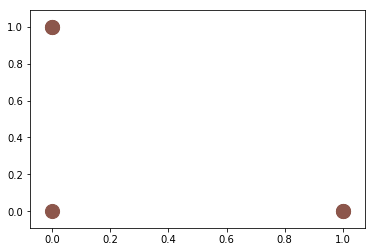

In [0]:
# Visualising the clusters
plt.scatter(x_test_new[y_kmeans==0].iloc[:,0],x_test_new[y_kmeans==0].iloc[:,1],s=100)
plt.scatter(x_test_new[y_kmeans==1].iloc[:,0],x_test_new[y_kmeans==1].iloc[:,1],s=100)
plt.scatter(x_test_new[y_kmeans==2].iloc[:,0],x_test_new[y_kmeans==2].iloc[:,1],s=100)
plt.scatter(x_test_new[y_kmeans==3].iloc[:,0],x_test_new[y_kmeans==3].iloc[:,1],s=100)
plt.scatter(x_test_new[y_kmeans==4].iloc[:,0],x_test_new[y_kmeans==4].iloc[:,1],s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200)

In [0]:
from sklearn.metrics import accuracy_score


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y_test=le.fit_transform(y_test)

In [0]:
y_test[:5]

array([4, 1, 2, 0, 4])

In [0]:
accuracy_score(y_test,y_kmeans)

0.1876

In [0]:

# import joblib
# # fn = 'cl_p2.pkl'
# # joblib.dump(cl, fn)

# fn1 = 'lr_p3.pkl'
# joblib.dump(lr, fn1)

# fn2 = 'xgb_p3.pkl'
# joblib.dump(xgb, fn2)

# fn3 = 'rf_p3.pkl'
# joblib.dump(rf, fn3)

# fn4 = 'knn_p3.pkl'
# joblib.dump(knn, fn4)

# fn4 = 'gnb_p3.pkl'
# joblib.dump(gnb, fn4)


['gnb_p3.pkl']